In [315]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import json
import requests
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plt.style.use('ggplot')

In [316]:
%store -r murder_aggravated_robbery16
%store -r murder_aggravated_robbery17
%store -r murder_aggravated_robbery18
%store -r murder_aggravated_robbery19
%store -r murder_aggravated_robbery20

In [318]:
# Merged crime activities df that also consisted of county and city df to population df
murder_aggravated_robbery16_20 = pd.concat([murder_aggravated_robbery16, murder_aggravated_robbery17, murder_aggravated_robbery18, murder_aggravated_robbery19, murder_aggravated_robbery20 ])
murder_aggravated_robbery16_20.sample(5)

,County,Year,Three Digit County Code,Public Trans,Population,Murder,Aggravated Assault,Robbery,Motor Vehicle Theft,Rape,Burglary,Larceny,Vandalism,Total,Crime Rate Limited
4,Cattaraugus,2016,009,No Public Trans,77711,0.0,148.0,16.0,92.0,112.0,408.0,1748.0,2248.0,256.0,329.425693
42,Richmond,2020,085,No Public Trans,495747,20.0,998.0,245.0,246.0,84.0,286.0,3163.0,3695.0,1509.0,304.389134
20,Hamilton,2019,041,No Public Trans,4438,0.0,4.0,0.0,4.0,2.0,12.0,36.0,52.0,8.0,180.261379
32,Oneida,2016,065,No Public Trans,230372,8.0,710.0,282.0,306.0,320.0,1708.0,7130.0,9144.0,1306.0,566.909173
50,Steuben,2019,101,No Public Trans,95328,0.0,154.0,16.0,64.0,106.0,304.0,1164.0,1532.0,234.0,245.468278


In [319]:
murder_aggravated_robbery16_20_bar = murder_aggravated_robbery16_20.groupby(['Year', 'Public Trans'], as_index=False)[['Murder', 'Aggravated Assault', 'Robbery', 'Motor Vehicle Theft', 'Rape', 'Burglary', 'Larceny', 'Vandalism']].sum()
murder_aggravated_robbery16_20_bar

,Year,Public Trans,Murder,Aggravated Assault,Robbery,Motor Vehicle Theft,Rape,Burglary,Larceny,Vandalism
0,2016,No Public Trans,253.0,19060.0,7467.0,5846.0,5210.0,24917.0,120228.0,150991.0
1,2016,Public Trans,674.0,39991.0,21561.0,16473.0,4912.0,42540.0,272468.0,331481.0
2,2017,No Public Trans,231.0,18349.0,6346.0,5492.0,5345.0,21071.0,113834.0,140397.0
3,2017,Public Trans,579.0,39286.0,19797.0,15513.0,5052.0,37587.0,266624.0,319724.0
4,2018,No Public Trans,233.0,17833.0,5706.0,5489.0,5156.0,17805.0,105311.0,128605.0
5,2018,Public Trans,608.0,38305.0,17720.0,15201.0,5482.0,33456.0,255785.0,304442.0
6,2019,No Public Trans,200.0,18008.0,5747.0,4986.0,5066.0,15564.0,99025.0,119575.0
7,2019,Public Trans,621.0,39864.0,17009.0,14914.0,5460.0,29826.0,247582.0,292322.0
8,2020,No Public Trans,321.0,18672.0,5540.0,7246.0,4527.0,16340.0,97685.0,121271.0
9,2020,Public Trans,897.0,42618.0,16362.0,22936.0,4520.0,34796.0,237943.0,295675.0


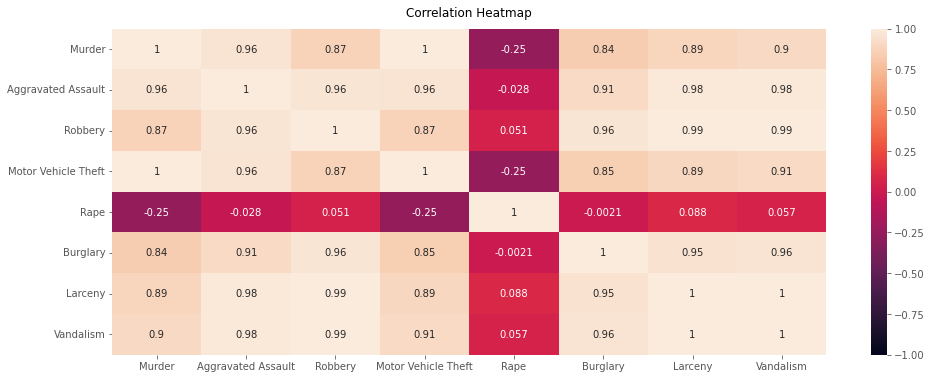

In [329]:
plt.figure(figsize=(16, 6))
x= murder_aggravated_robbery16_20_bar[['Murder', 'Aggravated Assault', 'Robbery', 'Motor Vehicle Theft', 'Rape', 'Burglary', 'Larceny', 'Vandalism']]
heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [327]:
# x= murder_aggravated_robbery16_20['Year']
# y= murder_aggravated_robbery16_20
# y1= murder_aggravated_robbery16_20['Aggravated Assault']
pd.options.plotting.backend = 'plotly'

fig = murder_aggravated_robbery16_20_bar.plot.bar(x='Public Trans', y=['Vandalism', 'Larceny', 'Aggravated Assault', 'Burglary', 'Robbery', 'Motor Vehicle Theft', 'Rape', 'Murder'], barmode='group', title='Crime Categories 2016-2022')
fig.update_yaxes(title='Crime Committed')
fig.update_layout(legend_title='Crimes')
fig.show()

In [328]:
murder_aggravated_robbery16_20_bar_train, murder_aggravated_robbery16_20_bar_test = train_test_split(murder_aggravated_robbery16_20_bar, test_size=.20)